# Problems:

- Underfitting refers to not capturing enough patterns in the data. The model performs poorly both in the training and the test set.

- Overfitting refers: a)capturing noise and b) capturing patterns which do not generalize well to unseen data. The model performs extremely well to the training set but poorly on the test set.

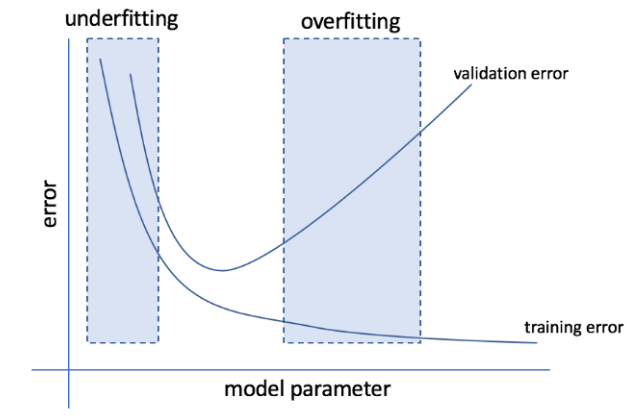

## Train_Test Split approach

- When Perform the model training on the training set and use the test set for validation purpose, ideally split the data into 70:30 or 80:20. If our data is huge and our test sample and train sample has the same distribution then this approach is acceptable.
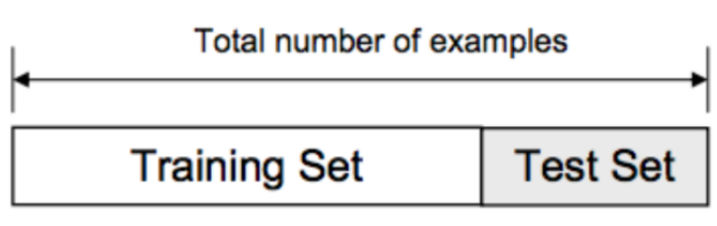

=> There is a possibility of high bias if we have limited data, because we would miss some information about the data which we have not used for training. 


As there is never enough data to train a model, removing a part of it for validation poses a problem of underfitting. By reducing the training data, we risk losing important patterns/ trends in data set, which in turn increases error induced by bias. So, what we require is a method that provides ample data for training the model and also leaves ample data for validation.

## Cross-validation with K-fold: the number of groups = k

It can be viewed as repeated holdout and we simply average scores after K different holdouts. Every data point gets to be in a validation set exactly once, and gets to be in a training set k-1times. 

This significantly reduces underfitting as we are using most of the data for fitting, and also significantly reduces overfitting as most of the data is also being used in validation set.
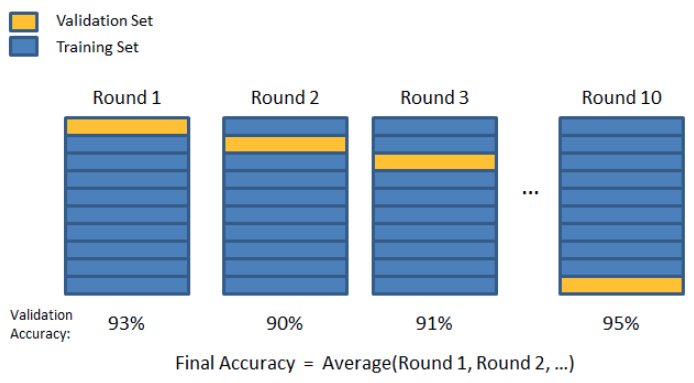
As a general rule, we choose k=5 or k=10, as these values have been shown empirically to yield test error estimates that suffer neither from excessively high bias nor high variance.

### This method follows the below steps:
1. Split the entire data randomly into k folds (value of k shouldn’t be too small or too high, ideally we choose 5 to 10 depending on the data size). The higher value of K leads to less biased model (but large variance might lead to overfit), where as the lower value of K is similar to the train-test split approach we saw before.
2. Then fit the model using the K — 1 (K minus 1) folds and validate the model using the remaining Kth fold. Note down the scores/errors.
3. Repeat this process until every K-fold serve as the test set. Then take the average of your recorded scores. That will be the performance metric for the model.

# Evaluate time series model AWS Forecast

To evaluate the accuracy of an algorithm for various forecasting scenarios and to tune the predictor, use
predictor metrics. Amazon Forecast uses backtesting to produce metrics.

Forecast automatically splits your input data into two datasets, training and test, as shown in the
following figure. Forecast decides how to split the input data by using the BackTestWindowOffset
parameter.
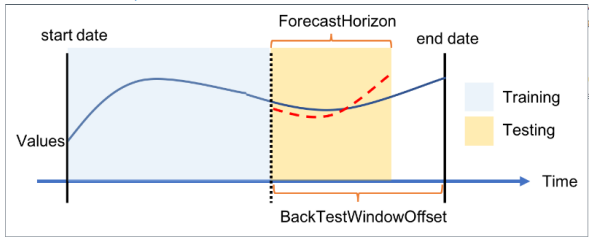

To evaluate the metrics in multiple backtest scenarios with different virtual forecast start
dates, as shown in the following figure, use the NumberOfBacktestWindows parameter in the
CreatePredictor operation. The default for the NumberOfBacktestWindows parameter is 1. If you
use the default, Forecast uses the simple splitting method shown in the preceding figure.
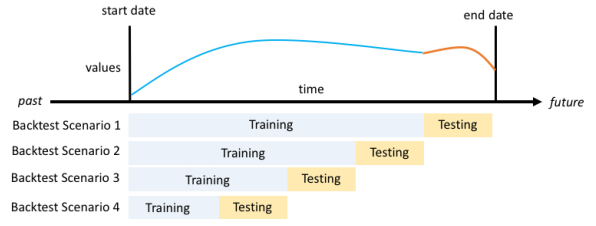

### EvaluationParameters

##### Contents
1. BackTestWindowOffset

The point from the end of the dataset where you want to split the data for model training and testing (evaluation). Specify the value as the number of data points. The default is the value of the forecast horizon. BackTestWindowOffset can be used to mimic a past virtual forecast start date. This value must be greater than or equal to the forecast horizon and less than half of the TARGET_TIME_SERIES dataset length.

ForecastHorizon <= BackTestWindowOffset < 1/2 * TARGET_TIME_SERIES dataset length

Type: Integer

Required: No

2. NumberOfBacktestWindows
The number of times to split the input data. 

The default is 1. 

Valid values are 1 through 5.

After training, Amazon Forecast calculates the root mean square error (RMSE) and weighted quantile
losses to determine how well the model predicted the test data in each backtest window and the
average value over all the backtest windows. These metrics measure the difference between the values
predicted by the model and the actual values in the test dataset

### Root Mean Square Error

RMSE is the square of the error term, which is the difference between the actual target value, yi,t,
and the predicted (forecasted) value, ŷi,t, where i denotes the item index ranging from 1 to the total
number of items, n, and t denotes the time index of the time series ranging from 1 to the final time in
the evaluation period, T.
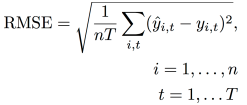

#### Prediction Quantiles and MAPE
- Prediction quantiles (intervals) express the uncertainty in the forecasts. By calculating prediction
quantiles, the model shows how much uncertainty is associated with each forecast. Without
accompanying prediction quantiles, point forecasts have limited value.
- Predicting forecasts at different quantiles is particularly useful when the costs of under and over predicting differ. 
- Amazon Forecast provides probabilistic predictions at three distinct quantiles—10%, 50%, and 90%—and calculates the associated loss (error) at each quantile. 
- The weighted quantile loss (wQuantileLoss) calculates how far off the forecast is from actual demand in either direction. This is calculated as a percentage of demand on average in each quantile. This metric helps capture the bias inherent in each quantile, which can't be captured by a calculation like MAPE (Mean Absolute Percentage Error), where the weights are equal. As with MAPE and RMSE, lower wQuantileLoss errors indicate better overall forecast accuracy

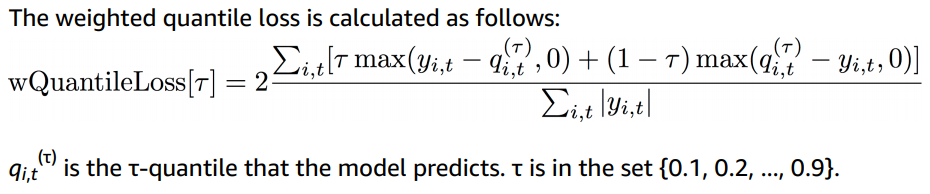

- Amazon Forecast calculates the weighted P10, P50, and P90 quantile losses, where τ is in the set {0.1, 0.5, 0.9}, respectively. This covers the standard 80% confidence interval

### 1. wQuantileLoss[0.1]: 
For the P10 prediction, the true value is expected to be lower than the predicted value 10% of the time.
    

Example:

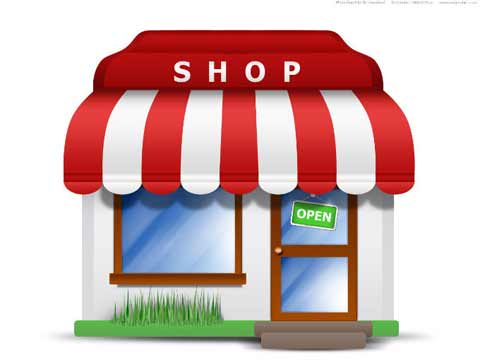

=> forecast product demand for winter gloves that sell well only during the fall and winter


- But you don't have a lot of storage space and the cost of invested capital is high, or if the price of being overstocked on winter gloves concerns you.
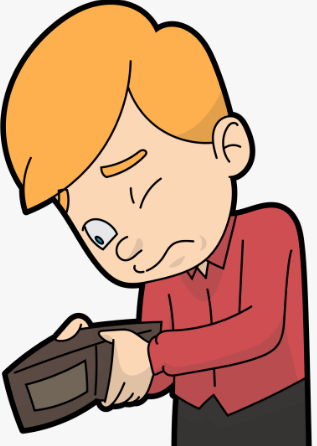

=> P10 forecast overestimates the demand for your winter gloves only 10% of the time, so 90% of the time you'll be sold out of your winter gloves.

### 2. wQuantileLoss[0.5]: 
- For the P50 prediction, the true value is expected to be lower than the predicted value 50% of the time.
- In most cases, the point forecasts that you generate internally or with other forecasting tools should match the P50 forecasts.
- If τ = 0.5, both weights are equal and the wQuantileLoss[0.5] reduces to the commonly used Mean Absolute Percentage Error (MAPE):
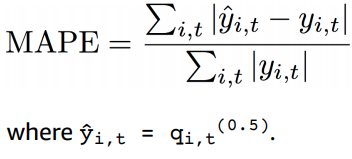

Examples: if you know that there'll be a moderate amount of demand for the gloves and aren't concerned about being overstocked, you might choose to use the P50 quantile to order gloves
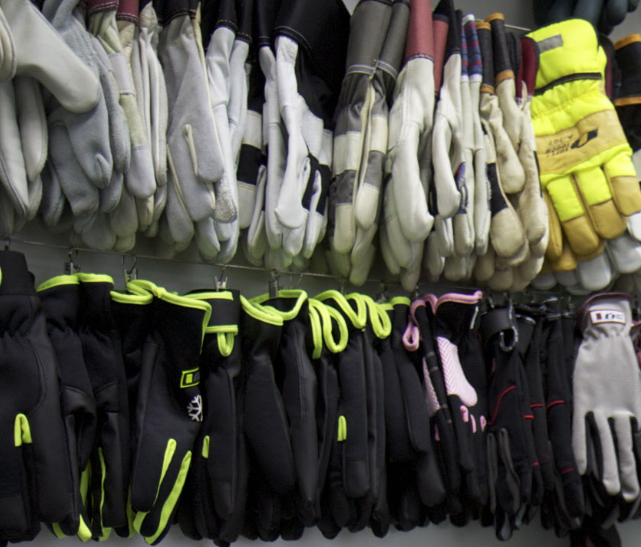

### wQuantileLoss[0.9]:
- For the P90 prediction, the true value is expected to be lower than the predicted value 90% of the time.
Examples: 
    - If you determine that being understocked on gloves will result in huge amounts of lost revenue, such as the cost of not selling gloves (warehouse, fix,...) is extremely high or the cost of invested capital is low—you might
choose to use the P90 quantile to order gloves.